In [1]:
import pandas as pd

#Importar los datos  de vino blanco
df = pd.read_csv("winequality-white.csv",delimiter=';')


In [19]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [20]:
df.columns = df.columns.str.replace('"', '')

In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
df.to_csv('winequality-white-cleaned.csv', index=False, sep=';')

In [23]:
df_cleaned = pd.read_csv('winequality-white-cleaned.csv', delimiter=';')

In [24]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [25]:
df.tail

<bound method NDFrame.tail of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [28]:
df_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  quality  
0  0.129032      0.5  
1  0.241935      0.5  
2  0.338710      0.5  
3  0.306452      0.5  
4  0.306452      0.5

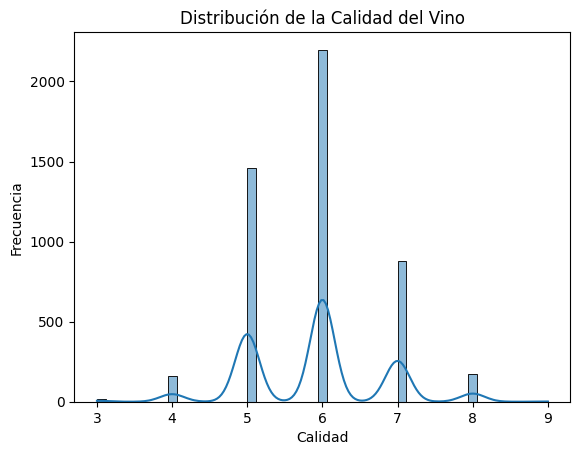

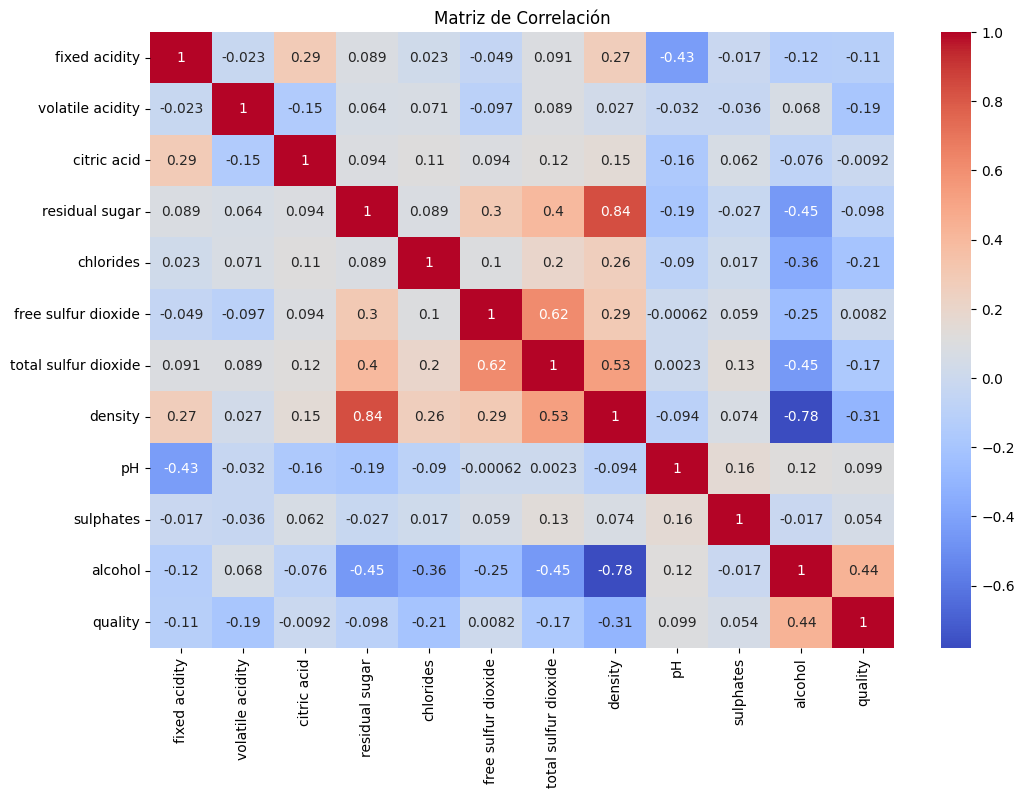

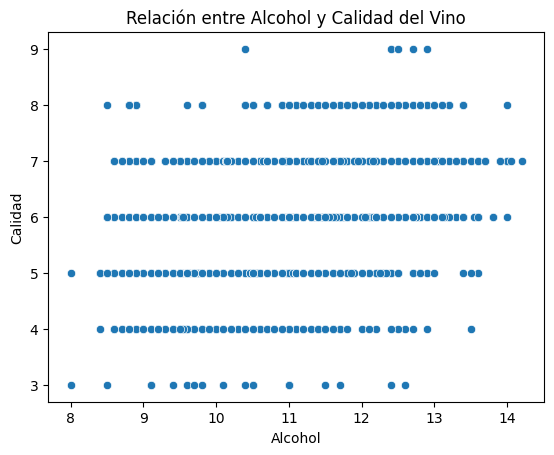

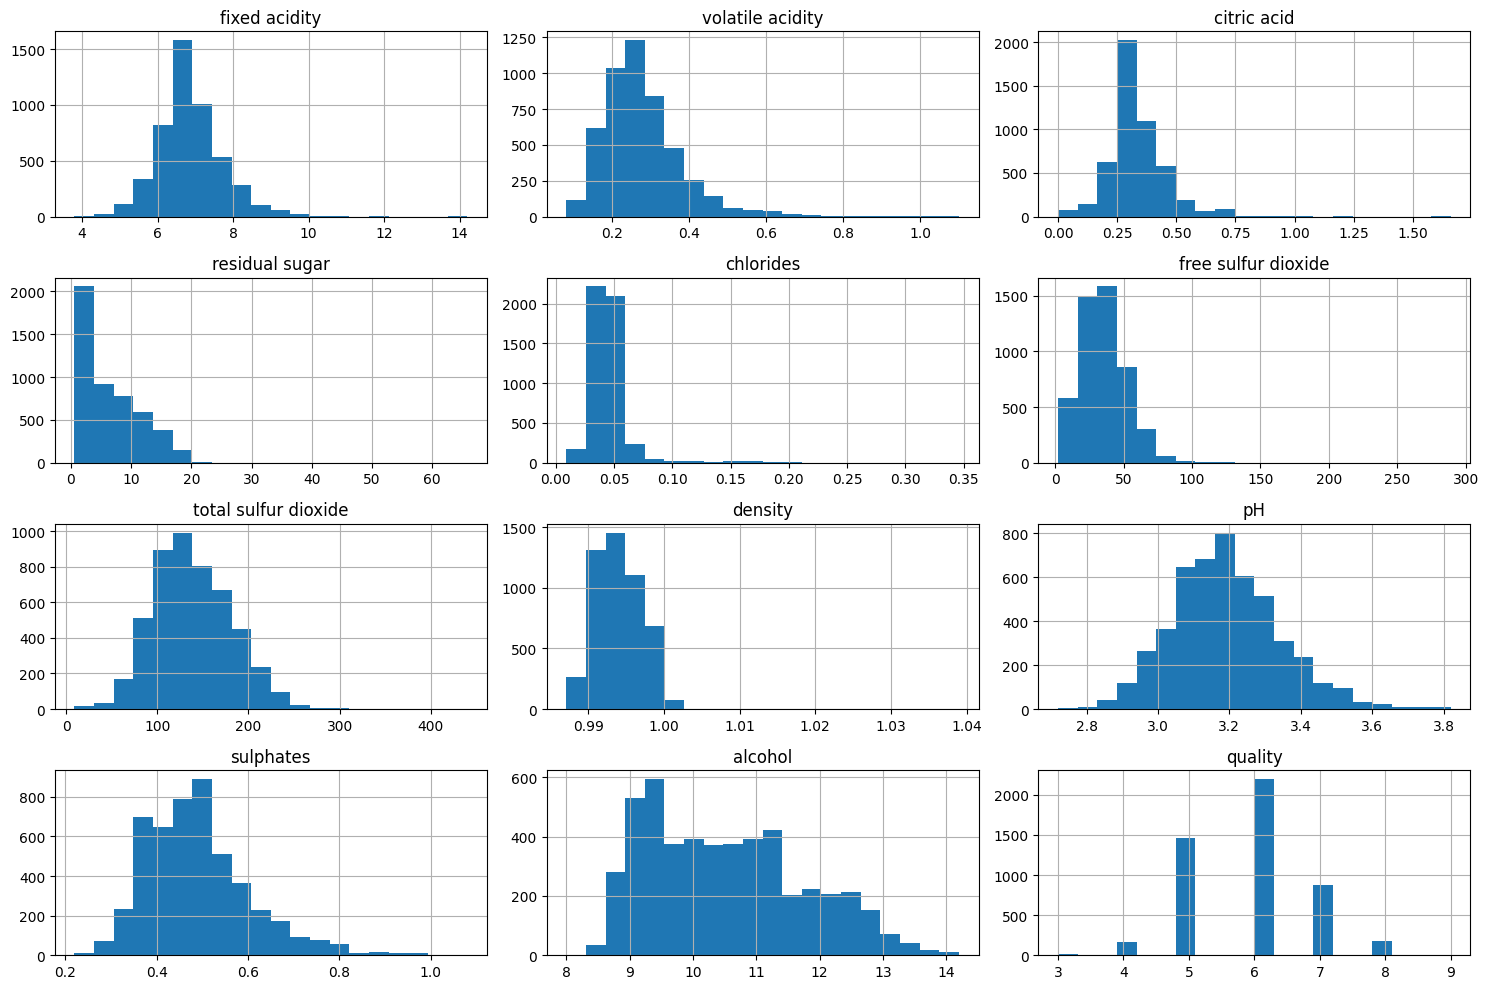

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la calidad del vino
sns.histplot(df['quality'], kde=True)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Diagramas de dispersión para variables relevantes
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Relación entre Alcohol y Calidad del Vino')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

# Histograma de cada característica
df.hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3918, 11)
X_test shape: (980, 11)
y_train shape: (3918,)
y_test shape: (980,)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.64      0.28      0.39        25
           5       0.71      0.68      0.70       291
           6       0.66      0.80      0.73       432
           7       0.78      0.60      0.68       192
           8       0.79      0.43      0.56        35

    accuracy                           0.70       980
   macro avg       0.60      0.47      0.51       980
weighted avg       0.70      0.70      0.69       980

Accuracy: 0.6969387755102041


c:\Users\jrios\Documents\Labotorios\Vinos\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jrios\Documents\Labotorios\Vinos\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jrios\Documents\Labotorios\Vinos\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)


Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


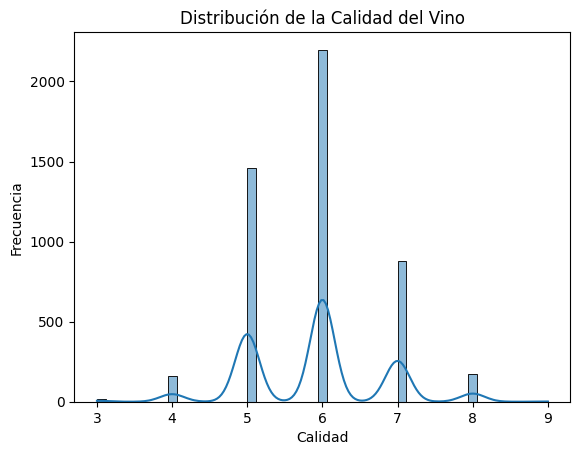

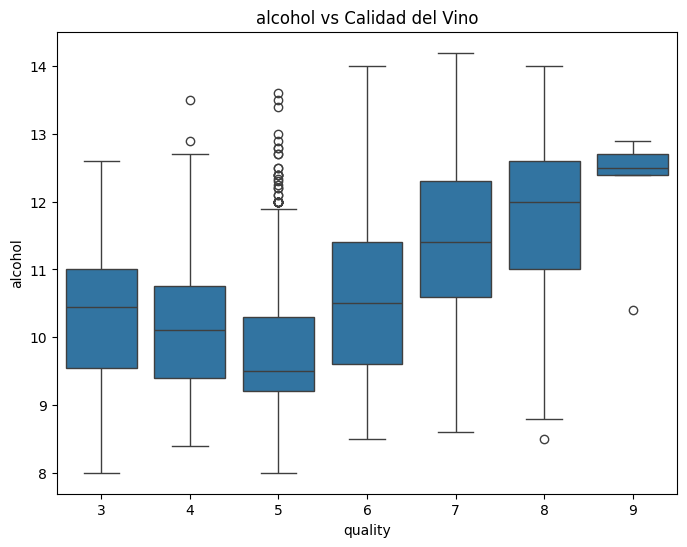

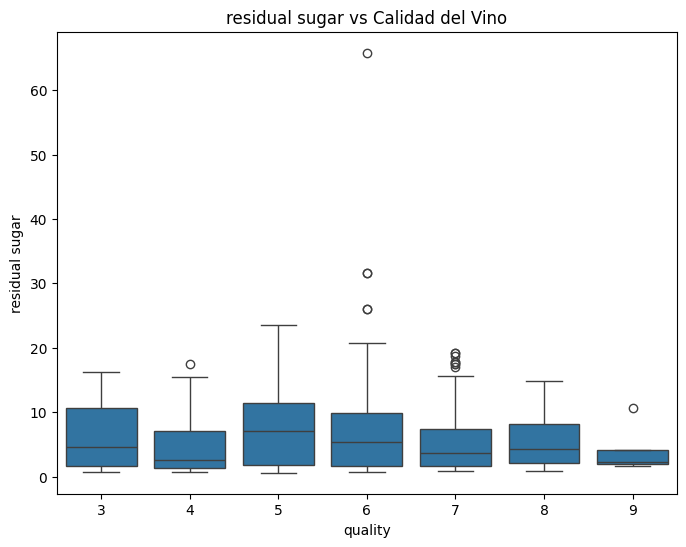

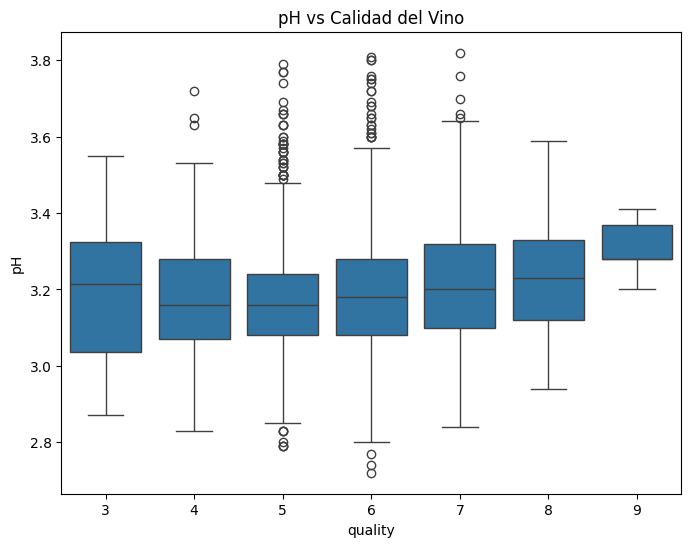

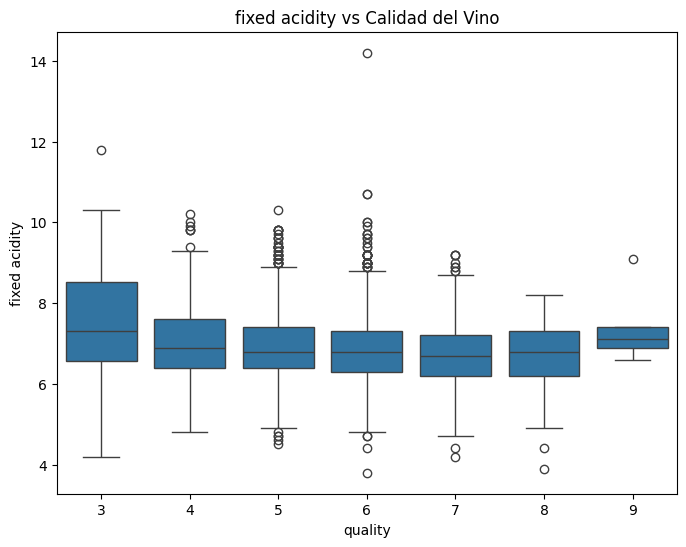

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo 'quality'
sns.histplot(y, kde=True)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplots de características frente a la calidad
features = ['alcohol', 'residual sugar', 'pH', 'fixed acidity']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} vs Calidad del Vino')
    plt.show()


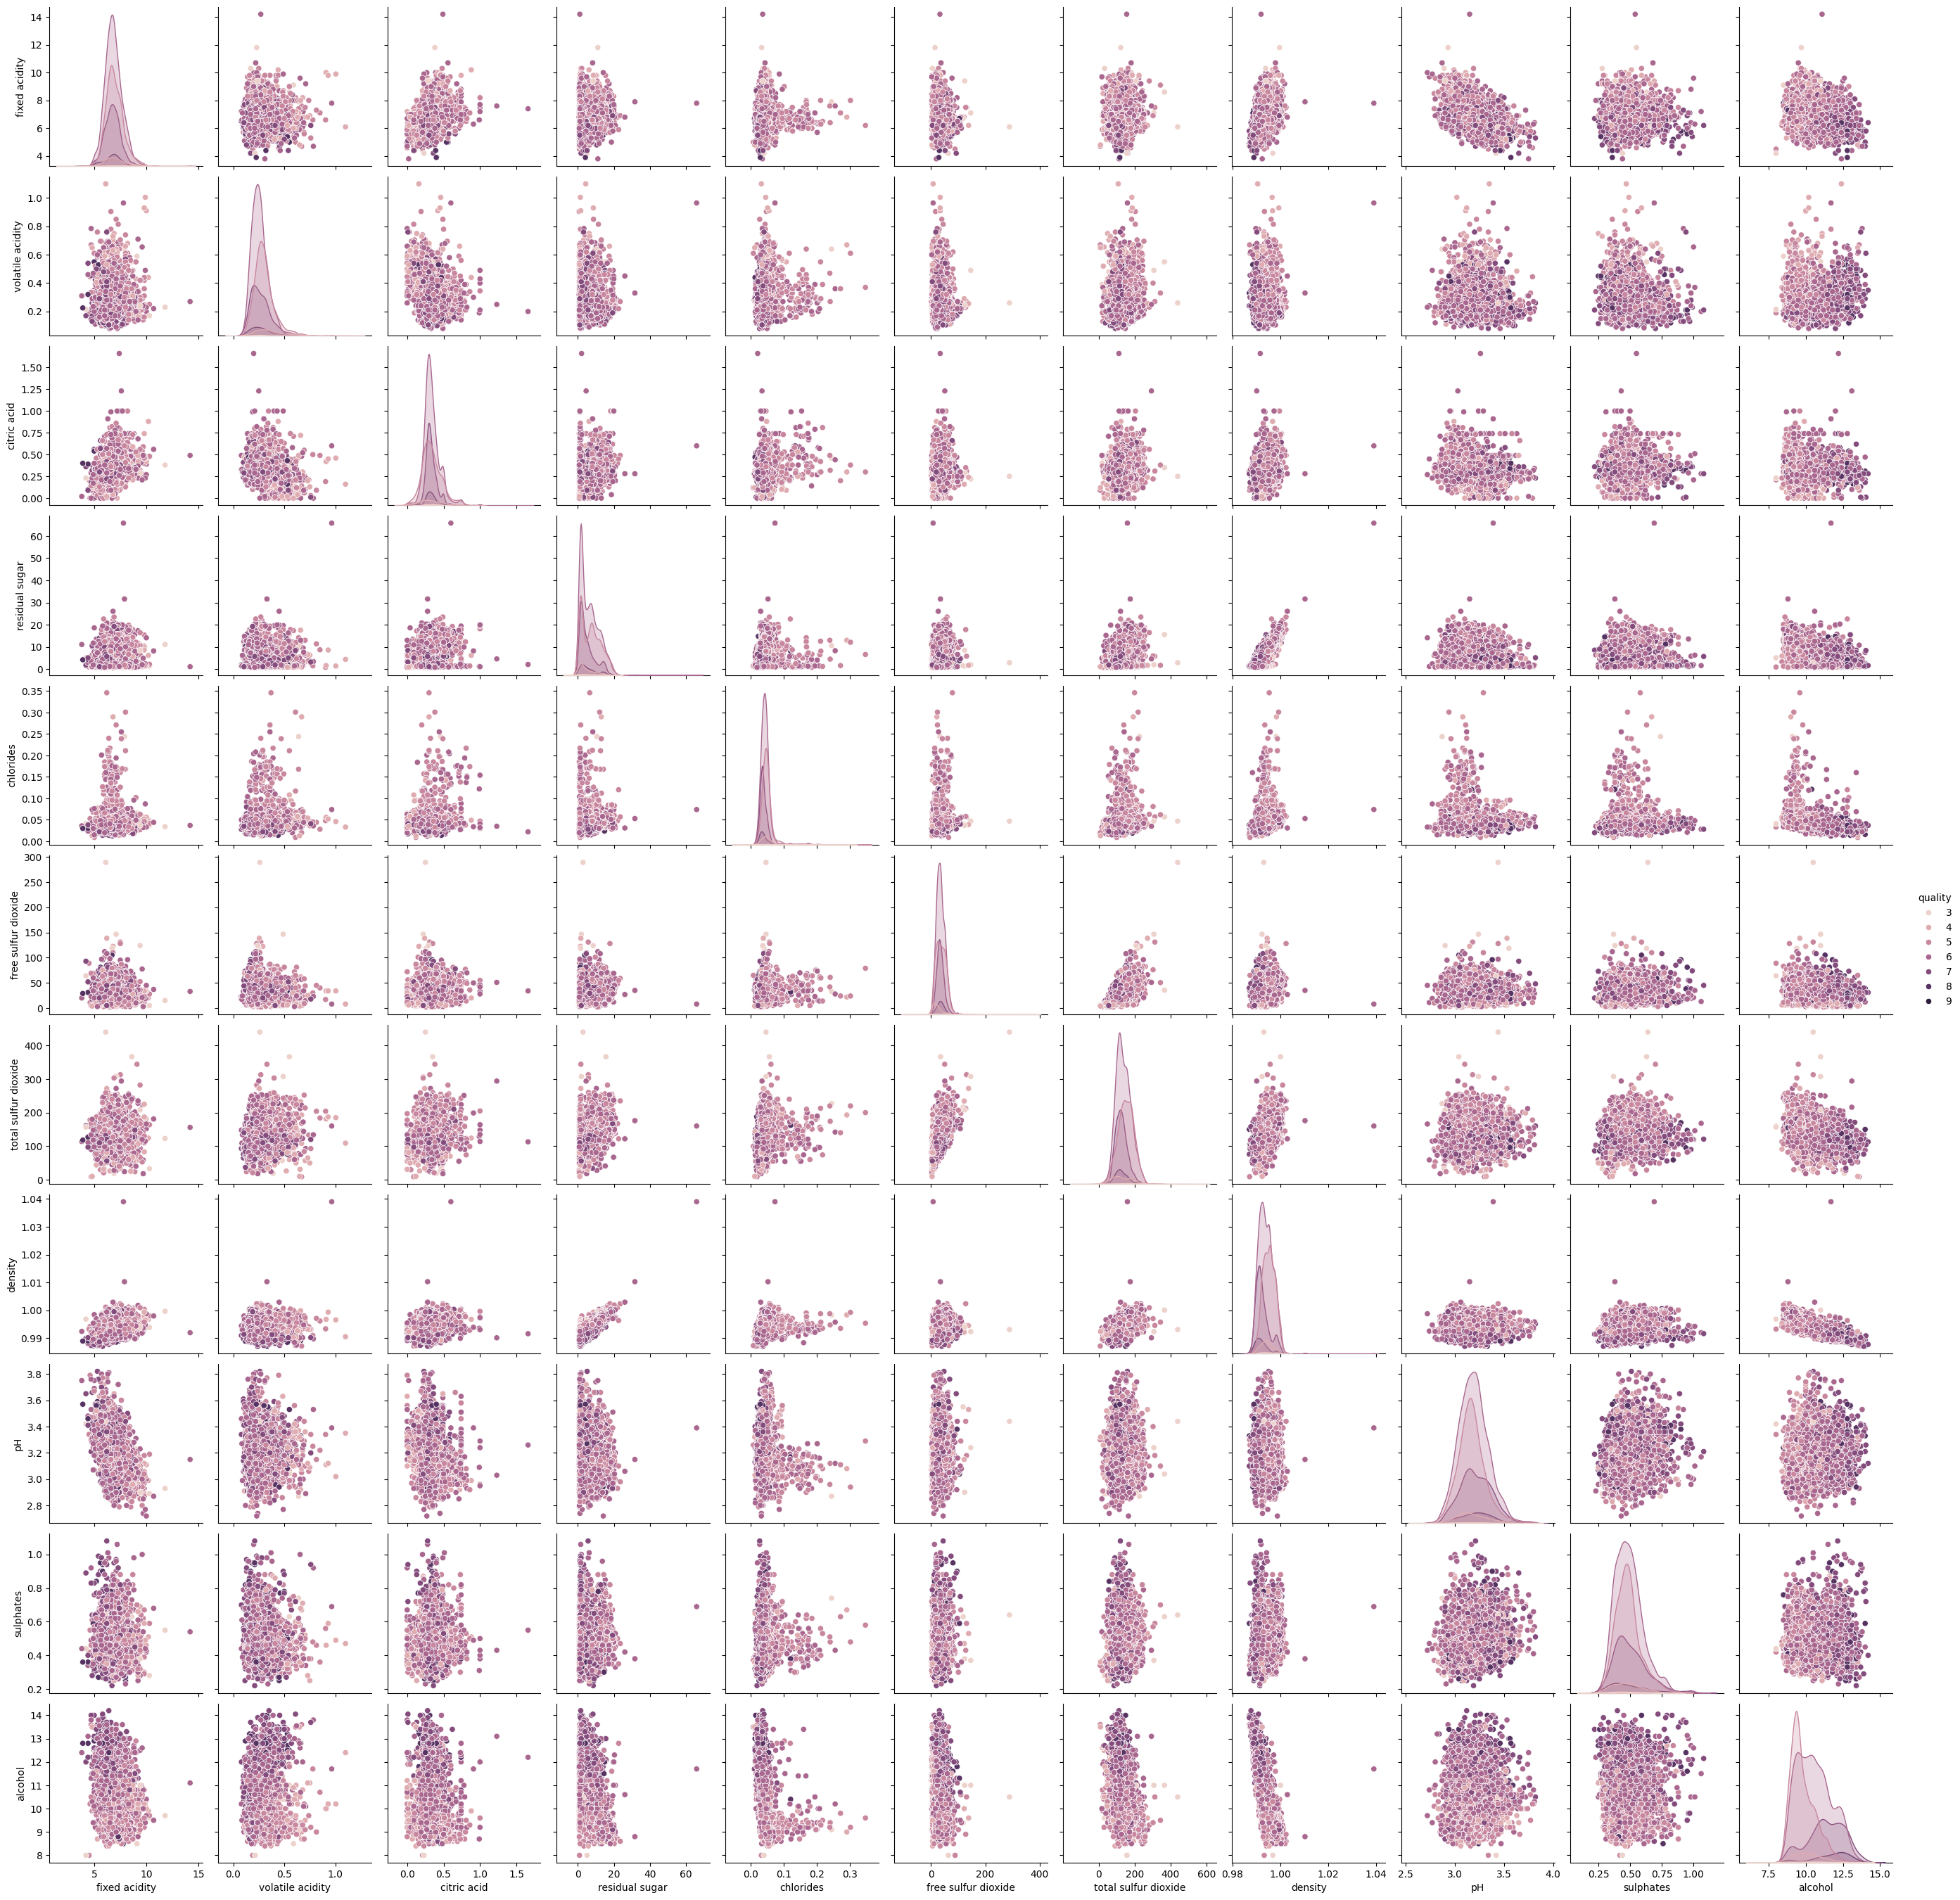

In [38]:
sns.pairplot(df, hue='quality')
plt.show()


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df.isnull().sum()  
df.fillna(df.mean(), inplace=True)  



In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.5690247717229254
R²: 0.2652750042179155


In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.6591836734693878
R²: 0.14886179692499635


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.3482283673469388
R²: 0.5503674032406387


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamos el modelo de regresión de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Realizamos las predicciones
y_pred = rf.predict(X_test_scaled)

# Evaluamos el modelo usando métricas de regresión
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.3482283673469388
R² Score: 0.5503674032406387


Mean Squared Error (MSE): 0.3482283673469388
R² Score: 0.5503674032406387


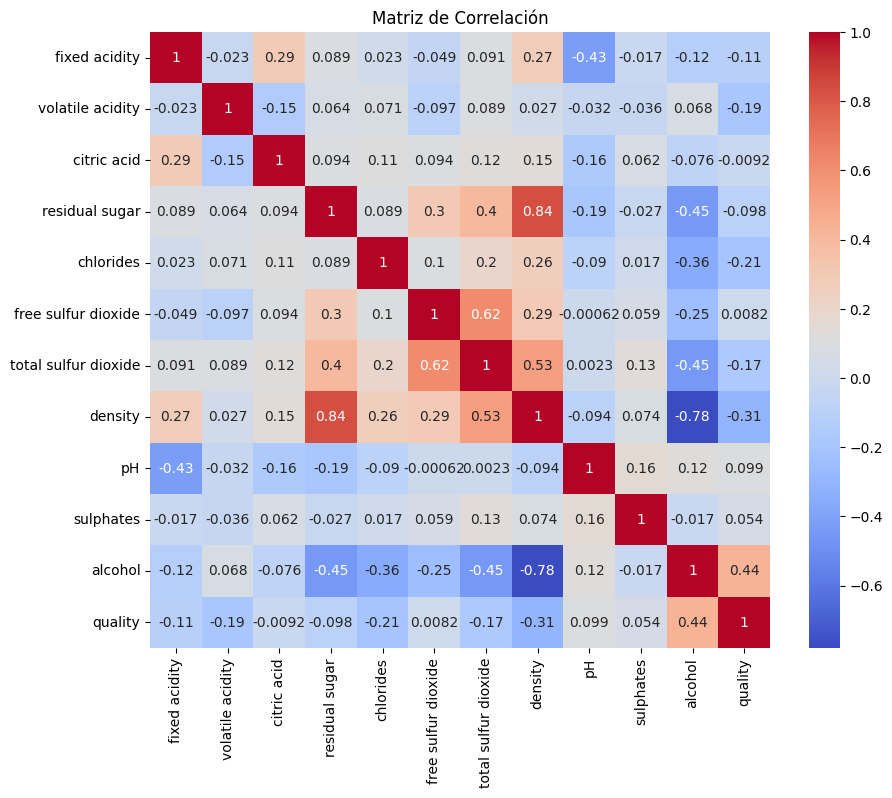

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y preparar los datos
df = pd.read_csv("winequality-white.csv", delimiter=';')

# Limpiar las comillas dobles de los nombres de las columnas
df.columns = df.columns.str.replace('"', '')

# Separar características y variable objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Realizar las predicciones
y_pred = rf.predict(X_test_scaled)

# Evaluar el modelo usando métricas de regresión
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
